In [1]:
state = 'ID' 
year = 2020
obj_type = 'cut_edges'
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of ID has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from ID_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 154 plans from file.


In [6]:
from pareto import filter_and_sort_pareto
from metrics import scores

plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
_,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
print(f"Selected {len(nondominated_warm_starts_plans)} nondominated warm start plans")

Selected 9 nondominated warm start plans


In [7]:
from epsilon_constraint import epsilon_constraint_method

(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity = 'lcut',                                             # {'lcut', 'scf', 'shir'} 
            cutoff=None,       
            verbose= True,
            warm_start_mode = 'user',                                        # {'None', 'user', 'refinement'}
            warm_starts=warm_starts,                                         # if you have user define warm starts else it is None
            starting_deviation=starting_deviation, 
            time_limit=7200, 
            sizes=None,      
            max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
            symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
            state=state,
            year=year
        )

Initially, L = 910358 and U = 928748 and k = 2.

****************************************
Trying deviation = 9195.53
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 4, 6, 7, 9, 13, 14, 17, 23, 24, 31, 36, 37, 39, 42], [0, 2, 3, 5, 8, 10, 11, 12, 15, 16, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 38, 40, 41, 43]]
Objective value: 11
Deviation: 1556.0

****************************************
Running labeling model!
****************************************
L = 910358 and U = 928748
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter 


CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1314 rows, 1052 columns and 3871 nonzeros
Model fingerprint: 0x1769ddcf
Variable types: 264 continuous, 788 integer (788 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]

User MIP start produced solution with objective 15 (0.02s)
Loaded user MIP start with objective 15

Presolve removed 790 rows and 522 columns
Presolve time: 0.01s
Presolved: 524 rows, 530 columns, 1631 nonzeros
Variable types: 0 continuous, 530 integer (530 binary)

Root relaxation: objective 3.419724e+00, 254 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bound

Variable types: 0 continuous, 530 integer (530 binary)

Root relaxation: objective 3.420119e+00, 324 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    3.42012    0   40   18.00000    3.42012  81.0%     -    0s
     0     0    4.10414    0   46   18.00000    4.10414  77.2%     -    0s
     0     0    4.73706    0   50   18.00000    4.73706  73.7%     -    0s
     0     0    4.75277    0   54   18.00000    4.75277  73.6%     -    0s
     0     0    4.75630    0   57   18.00000    4.75630  73.6%     -    0s
     0     0    4.75630    0   57   18.00000    4.75630  73.6%     -    0s
     0     0    4.77656    0   53   18.00000    4.77656  73.5%     -    0s
     0     0    4.86560    0   53   18.00000    4.86560  73.0%     -    0s
     0     0    4.87655    0   57   18.00000    4.87655  72.9%     -    0s
     0     0    4.94014    0 

     0     0    4.89922    0   58   20.00000    4.89922  75.5%     -    0s
     0     0    4.90055    0   61   20.00000    4.90055  75.5%     -    0s
     0     0    4.97755    0   67   20.00000    4.97755  75.1%     -    0s
     0     0    4.97878    0   70   20.00000    4.97878  75.1%     -    0s
     0     0    4.98222    0   71   20.00000    4.98222  75.1%     -    0s
     0     0    4.98377    0   72   20.00000    4.98377  75.1%     -    0s
     0     0    4.98418    0   75   20.00000    4.98418  75.1%     -    0s
     0     0    4.98851    0   65   20.00000    4.98851  75.1%     -    0s
     0     0    5.00915    0   58   20.00000    5.00915  75.0%     -    0s
     0     0    5.02378    0   67   20.00000    5.02378  74.9%     -    0s
     0     0    5.02566    0   68   20.00000    5.02566  74.9%     -    0s
     0     0    5.02567    0   69   20.00000    5.02567  74.9%     -    0s
     0     0    5.02745    0   69   20.00000    5.02745  74.9%     -    0s
     0     0    5.02745  

     0     0    4.96860    0   63   29.00000    4.96860  82.9%     -    0s
     0     2    4.97944    0   63   29.00000    4.97944  82.8%     -    0s
 34996  7922   20.88365   30   56   29.00000   17.38528  40.1%  16.6    5s
 76095 12418   22.72788   32   37   29.00000   19.84926  31.6%  16.3   10s
 119267 13190   25.82810   24  136   29.00000   22.00000  24.1%  15.9   15s
 159208  8994   25.17679   28  131   29.00000   23.81264  17.9%  15.6   20s

Cutting planes:
  Gomory: 3
  Zero half: 4
  Lazy constraints: 64

Explored 186543 nodes (2880378 simplex iterations) in 23.37 seconds (5.83 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 29 

Optimal solution found (tolerance 0.00e+00)
Best objective 2.900000000000e+01, best bound 2.900000000000e+01, gap 0.0000%

User-callback calls 374948, time in user-callback 2.52 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
plan = [[1, 6, 

In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
epsilon = 1 / (2 * G._k)
min_deviation = min(round(r[2], 1) for r in result)

if min_deviation < epsilon:
    no_solution_region = None
else:
    no_solution_region = [0, min_deviation]

if no_solution_region is not None:
    print(f"No feasible solution was found within the region: {no_solution_region}")


####################################################################################################
Pareto Frontier for state ID,  objective cut_edges
####################################################################################################

Pareto front plans: [[[1, 6, 13, 15, 19, 20, 21, 22, 24, 29, 34, 35, 38, 39, 41], [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 23, 25, 26, 27, 28, 30, 31, 32, 33, 36, 37, 40, 42, 43]], [[1, 2, 3, 11, 12, 19, 21, 28, 29, 35], [0, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43]], [[0, 1, 5, 8, 15, 19, 20, 22, 26, 27, 28, 29, 30, 32, 34, 35, 38, 41, 43], [2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 21, 23, 24, 25, 31, 33, 36, 37, 39, 40, 42]], [[1, 2, 11, 12, 15, 20, 21, 35, 41], [0, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 42, 43]], [[0, 1, 4, 5, 7, 9, 14, 17, 23, 27, 

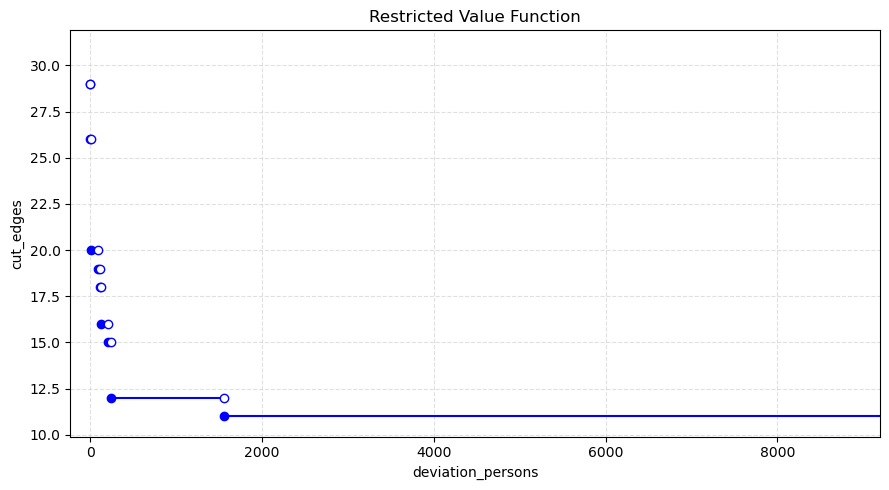

In [10]:
from pareto import plot_pareto_frontiers

plot_pareto_frontiers(
                G,
                method='epsilon_constraint_method',
                plans=None,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_type,                               
                ideal_population=G._ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=result                               #if method ='heuristic' is None 
             ) 


####################################################################################################
Pareto maps for state ID, objective cut_edges
####################################################################################################



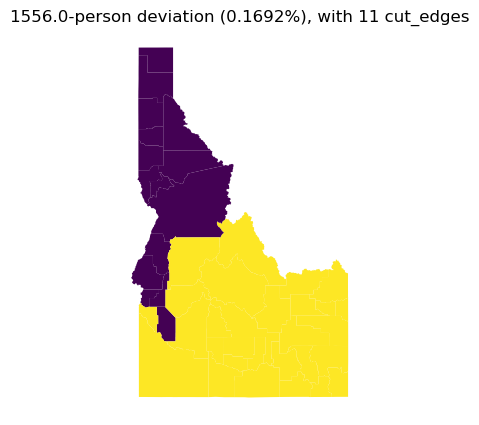

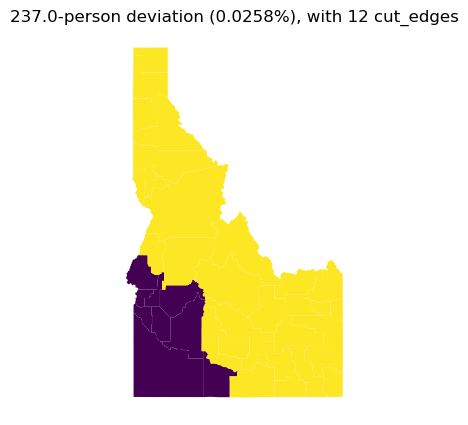

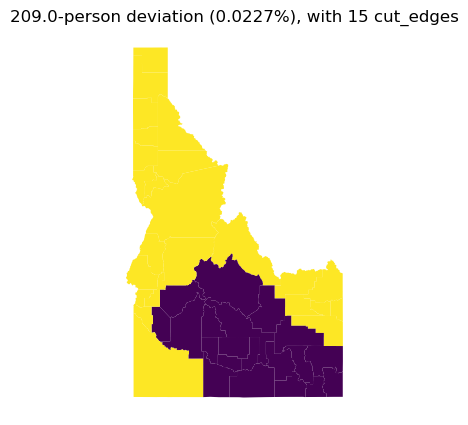

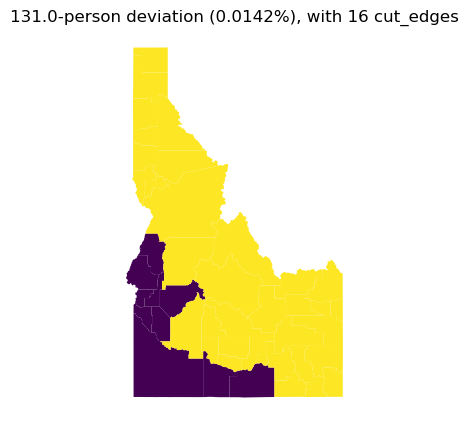

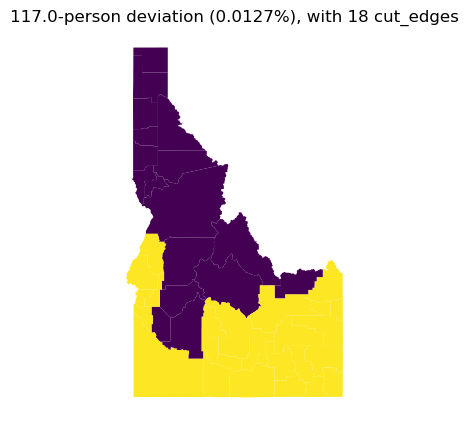

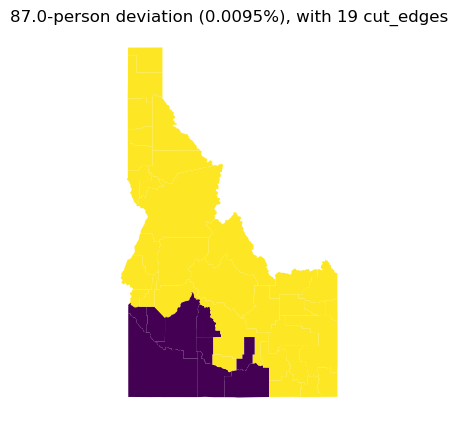

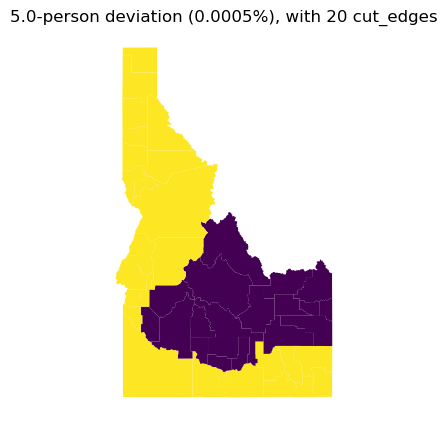

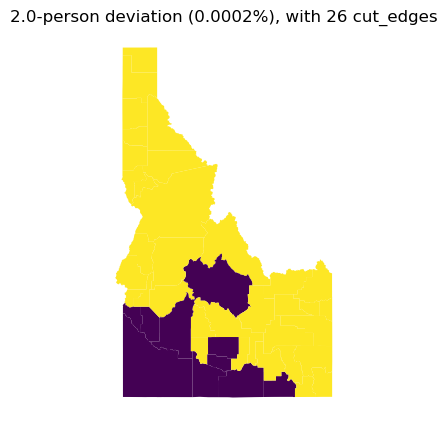

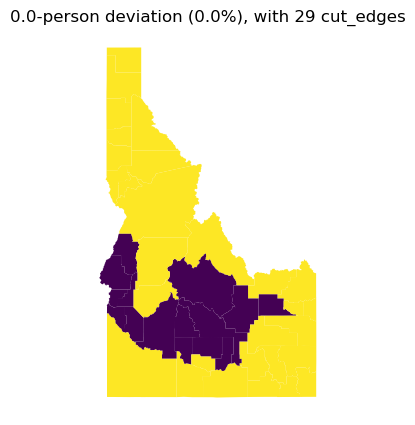

In [11]:
from draw import draw_plan
from metrics import observed_deviation_persons, compute_obj

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: int(x)}
G._L = 0
G._U = G._k * G._ideal_population

for plan, obj_bound, dev in result:
    obs_dev = observed_deviation_persons(G, plan, G._ideal_population)
    obj = compute_obj(G, plan, obj_type)
    obj_val = format_obj.get(obj_type, lambda x: round(x, 4))(obj)
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    title = f"{round(obs_dev, 2)}-person deviation ({deviation_percentage}%), with {obj_val} {obj_type}"
    draw_plan(filepath, filename2, G, plan, title=title, year=year)